In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate2d

### SSD

In [29]:
def SSD(original, template):
    oh, ow = original.shape 
    th, tw = template.shape  

    min_diff = float('inf')  
    min_loc = (0, 0)         

    for i in range(oh - th):  
        for j in range(ow - tw):  
            roi = original[i:i+th, j:j+tw]  
            diff = np.sum((roi - template)**2)  
            if diff < min_diff:
                min_diff = diff
                min_loc = (j, i)  
    return min_loc

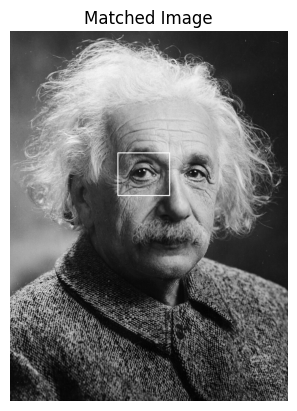

In [30]:
original_image = cv2.imread('../data/Albert_Einstein_Head.jpg', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('../data/Albert_Einstein_Eye.jpg', cv2.IMREAD_GRAYSCALE)

w, h = template_image.shape[::-1]

min_loc = SSD(original_image, template_image)

top_left = min_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(original_image, top_left, bottom_right, 255, 2)


plt.imshow(original_image, cmap='gray')
plt.title('Matched Image')
plt.axis('off')
plt.show()

## NCC

In [ ]:
def NCC(original, template):
    oh, ow = original.shape 
    th, tw = template.shape 

    template_mean = np.mean(template)
    template_norm = template - template_mean  

    ncc_map = np.zeros((oh - th + 1, ow - tw + 1))  

    for i in range(oh - th + 1):  
        for j in range(ow - tw + 1):  
            roi = original[i:i+th, j:j+tw] 
            roi_mean = np.mean(roi)
            roi_norm = roi - roi_mean  

            numerator = np.sum(template_norm * roi_norm)
            denominator = np.sqrt(np.sum(template_norm**2)) * np.sqrt(np.sum(roi_norm**2))

            if denominator == 0:
                ncc_map[i, j] = 0
            else:
                ncc_map[i, j] = numerator / denominator

    max_loc = np.unravel_index(np.argmax(ncc_map), ncc_map.shape)

    return max_loc, ncc_map


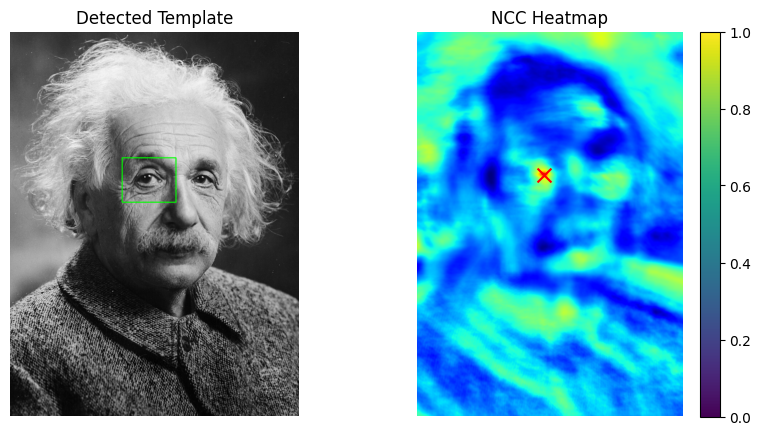

In [ ]:
original_image = cv2.imread('../data/Albert_Einstein_Head.jpg', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('../data/Albert_Einstein_Eye.jpg', cv2.IMREAD_GRAYSCALE)

th, tw = template_image.shape  

best_match, ncc_map = NCC(original_image, template_image)

original_image_color = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

top_left = (best_match[1], best_match[0]) 
bottom_right = (top_left[0] + tw, top_left[1] + th)
cv2.rectangle(original_image_color, top_left, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image_color, cmap='gray')
plt.title("Detected Template")
plt.axis("off")

# Plot NCC heatmap
plt.subplot(1, 2, 2)
plt.imshow(ncc_map, cmap='jet')
plt.scatter(best_match[1], best_match[0], color='red', marker='x', s=100)
plt.title("NCC Heatmap")
plt.colorbar()
plt.axis("off")

plt.show()
